In [2]:
import sys
print(sys.executable)
from jupyter_core.paths import jupyter_data_dir
import cv2
import numpy as np
import matplotlib.pyplot as plt

/usr/bin/python3


(720, 1280)


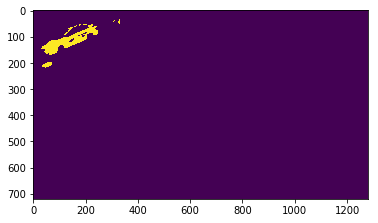

In [85]:
img = np.array(cv2.imread("/home/dongqxia/projects/bgsubtraction/submission/test/365.png", 0))
plt.imshow(img)
print(np.shape(img))

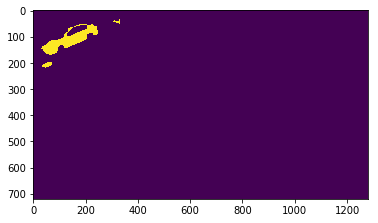

In [86]:
kernel = np.ones((11,11),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.imshow(opening)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[array([[[ 67, 196]],

       [[ 66, 197]],

       [[ 61, 197]],

       [[ 60, 198]],

       [[ 57, 198]],

       [[ 56, 199]],

       [[ 55, 199]],

       [[ 54, 200]],

       [[ 53, 200]],

       [[ 52, 201]],

       [[ 50, 201]],

       [[ 49, 202]],

       [[ 46, 202]],

       [[ 46, 203]],

       [[ 44, 205]],

       [[ 43, 205]],

       [[ 42, 206]],

       [[ 41, 206]],

       [[ 40, 207]],

       [[ 40, 208]],

       [[ 37, 211]],

       [[ 36, 211]],

       [[ 34, 213]],

       [[ 34, 214]],

       [[ 35, 215]],

       [[ 38, 215]],

       [[ 39, 216]],

       [[ 44, 216]],

       [[ 45, 217]],

       [[ 46, 217]],

       [[ 47, 218]],

       [[ 47, 219]],

       [[ 48, 220]],

       [[ 50, 220]],

       [[ 50, 219]],

       [[ 52, 217]],

       [[ 52, 216]],

       [[ 53, 215]],

       [[ 54, 215]],

       [[ 56, 217]],

       [[ 57, 217]],

       [[ 58, 218]],

       [[ 59, 217]],

       [[ 60, 217]],

       [[ 63, 214]],

       [[

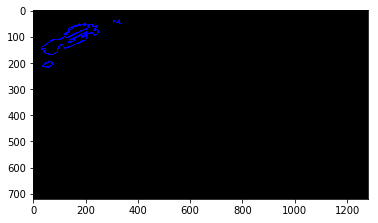

In [90]:
new_img, contours, hir = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(contours)
new_img = np.zeros((np.shape(opening)[0], np.shape(opening)[1], 3))
cv2.drawContours(new_img, contours, -1,(0,0,255), 3)
plt.imshow(new_img)

138.0 104.0 7706.0
0.1844556896465044


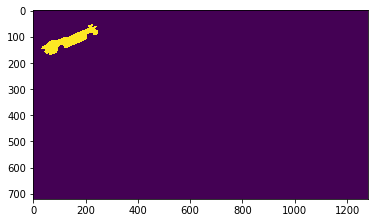

In [97]:
new_img1 = np.zeros((np.shape(opening)[0], np.shape(opening)[1]))
for cnt in contours:
    (x,y),r = cv2.minEnclosingCircle(cnt)
    area = cv2.contourArea(cnt)
    if area > 1000 and area/(3.1415926*r*r) > 0.1:
        print(x, y, area)
        print(area/(3.1415926*r*r))
        cv2.fillPoly(new_img1, pts =[cnt], color=(255, 255, 255))
        
plt.imshow(new_img1)

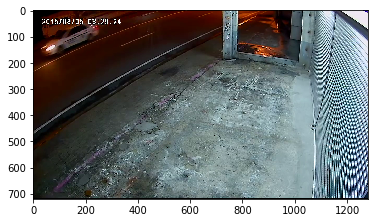

In [94]:
init_img = cv2.imread("/home/dongqxia/projects/bgsubtraction/submission/test/init_365.png")
plt.imshow(init_img)

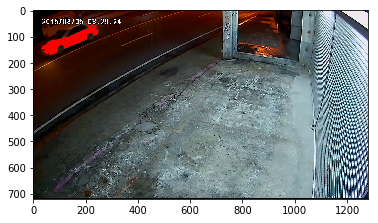

In [105]:
init_img[new_img1==255, :] = (255, 0, 0)
plt.imshow(init_img)